In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# I'm using diabetes dataset, with an aim to predict the probability of a patient getting diabetes using various parameters.
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.dtypes # To find out the type of data we are dealing with.

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [7]:
df.isnull().sum() # To find out if there any missing values.

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
x = df.drop(columns = ['diabetes'])

In [9]:
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [10]:
y = df['diabetes'].values # Outcome Column

In [11]:
label_encoder = LabelEncoder()
x['gender'] = label_encoder.fit_transform(df['gender'])
x['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

In [12]:
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [13]:
x.dtypes # This step ensures that all the data is ready to be normalized.

gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
dtype: object

In [14]:
scaler = MinMaxScaler()

In [15]:
x2 = scaler.fit_transform(x)

In [16]:
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [17]:
x2

array([[0.        , 1.        , 0.        , ..., 0.17717087, 0.56363636,
        0.27272727],
       [0.        , 0.67467467, 0.        , ..., 0.20203081, 0.56363636,
        0.        ],
       [0.5       , 0.34934935, 0.        , ..., 0.20203081, 0.4       ,
        0.35454545],
       ...,
       [0.5       , 0.82482482, 0.        , ..., 0.20798319, 0.4       ,
        0.34090909],
       [0.        , 0.2992993 , 0.        , ..., 0.29656863, 0.09090909,
        0.09090909],
       [0.        , 0.71221221, 0.        , ..., 0.14495798, 0.56363636,
        0.04545455]])

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, test_size = 0.3, random_state = 42) 
# Here, we are splitting the data into train and test to develop our predicting algorithm.

In [19]:
kf = KFold( n_splits = 10, shuffle = True, random_state = 42)

In [20]:
# With the preprocessing done, we will now try and find the coorelation amongnst the features in the data for prediction.

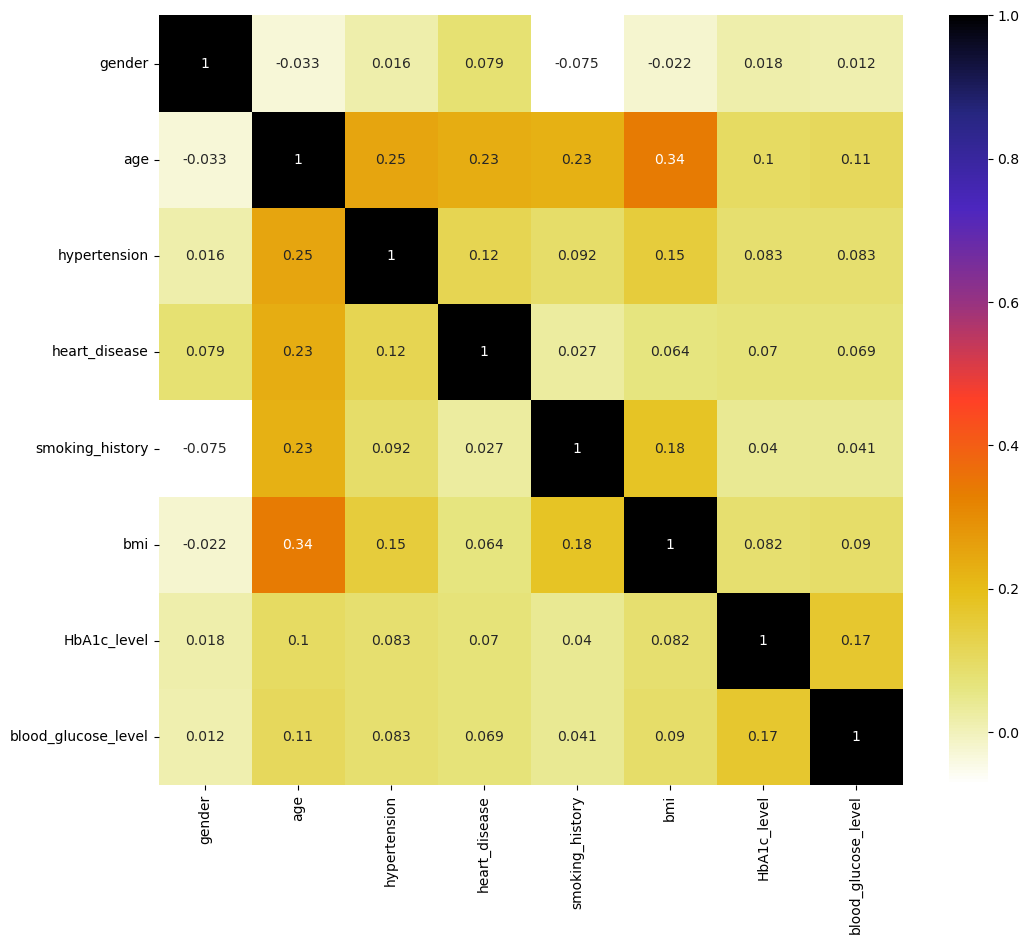

In [21]:
plt.figure( figsize = (12, 10))
cor = x_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r )
plt.show()

In [22]:
# With the help of heatmap, we are able to find out, there is not significant overlap amongnst the features.

In [23]:
# To generate the best result, we are experimenting with 3 different types of algorithms.

In [24]:
knn = KNeighborsClassifier ( n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [25]:
rf = RandomForestClassifier ( max_features = 7, n_estimators = 500)
rf.fit(x_train, y_train)

RandomForestClassifier(max_features=7, n_estimators=500)

In [26]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [27]:
y_pred_1 = rf.predict(x_test)
y_pred_2 = nb.predict(x_test)
y_pred_3 = knn.predict(x_test)

In [28]:
accuracy_1 = accuracy_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1, average = 'weighted')
recall_1 = recall_score(y_test, y_pred_1, average = 'weighted')
f1_score_1 = f1_score(y_test, y_pred_1, average = 'weighted')
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)
report_1 = classification_report(y_test, y_pred_1)

In [29]:
accuracy_2 = accuracy_score(y_test, y_pred_2)
precision_2 = precision_score(y_test, y_pred_2, average = 'weighted')
recall_2 = recall_score(y_test, y_pred_2, average = 'weighted')
f1_score_2 = f1_score(y_test, y_pred_2, average = 'weighted')
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
report_2 = classification_report(y_test, y_pred_2)

In [30]:
accuracy_3 = accuracy_score(y_test, y_pred_3)
precision_3 = precision_score(y_test, y_pred_3, average = 'weighted')
recall_3 = recall_score(y_test, y_pred_3, average = 'weighted')
f1_score_3 = f1_score(y_test, y_pred_3, average = 'weighted')
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)
report_3 = classification_report(y_test, y_pred_3)

In [31]:
rf_auc = roc_auc_score(y_test, y_pred_1)
nb_auc = roc_auc_score(y_test, y_pred_2)
k_auc = roc_auc_score(y_test, y_pred_3)

Random Forest : 

Acccuracy : 0.9702333333333333
Precision : 0.9695597666107131
Recall : 0.9702333333333333
F1 score : 0.9681334219827712
Confusion Matrix :
 [[27345   108]
 [  785  1762]]
Classification Report :

               precision    recall  f1-score   support

           0       0.97      1.00      0.98     27453
           1       0.94      0.69      0.80      2547

    accuracy                           0.97     30000
   macro avg       0.96      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000

ROC AUC : 
 0.8439301357407201


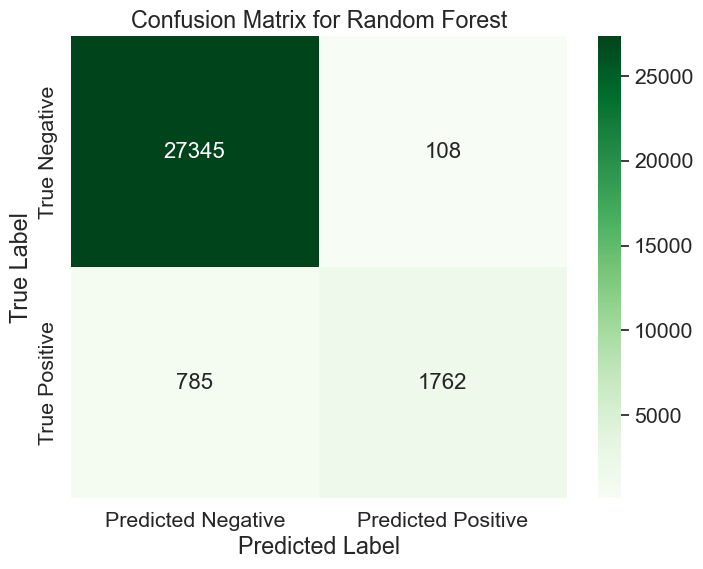

In [32]:
print("Random Forest : \n")
print("Acccuracy :", accuracy_1)
print("Precision :", precision_1)
print("Recall :", recall_1)
print("F1 score :", f1_score_1)
print("Confusion Matrix :\n", conf_matrix_1)
print("Classification Report :\n\n", report_1)
print("ROC AUC : \n", rf_auc)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4) 
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Greens', annot_kws={'size': 16},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

Naive Bayers : 

Acccuracy : 0.9059666666666667
Precision : 0.9229949442876814
Recall : 0.9059666666666667
F1 score : 0.9128818178641434
Confusion Matrix :
 [[25536  1917]
 [  904  1643]]
Classification Report Naive Bayers is :

               precision    recall  f1-score   support

           0       0.97      0.93      0.95     27453
           1       0.46      0.65      0.54      2547

    accuracy                           0.91     30000
   macro avg       0.71      0.79      0.74     30000
weighted avg       0.92      0.91      0.91     30000

ROC AUC : 
 0.787622100210502


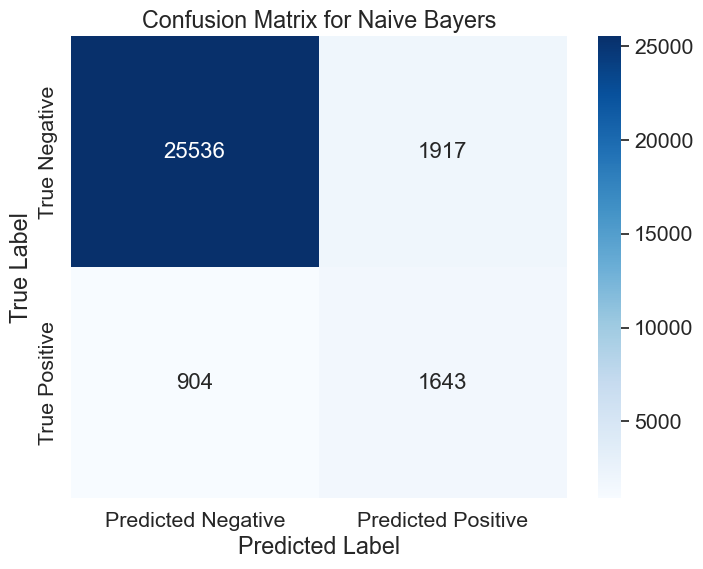

In [33]:
print("Naive Bayers : \n")
print("Acccuracy :", accuracy_2)
print("Precision :", precision_2)
print("Recall :", recall_2)
print("F1 score :", f1_score_2)
print("Confusion Matrix :\n", conf_matrix_2)
print("Classification Report Naive Bayers is :\n\n", report_2)
print("ROC AUC : \n", nb_auc)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4) 
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayers')
plt.show()

K- Nearest Neighbours:

Acccuracy : 0.9522
Precision : 0.9492106411345032
Recall : 0.9522
F1 score : 0.946471059722563
Confusion Matrix :
 [[27259   194]
 [ 1240  1307]]
Classification Report :

               precision    recall  f1-score   support

           0       0.96      0.99      0.97     27453
           1       0.87      0.51      0.65      2547

    accuracy                           0.95     30000
   macro avg       0.91      0.75      0.81     30000
weighted avg       0.95      0.95      0.95     30000

ROC AUC : 
 0.7530430528724176


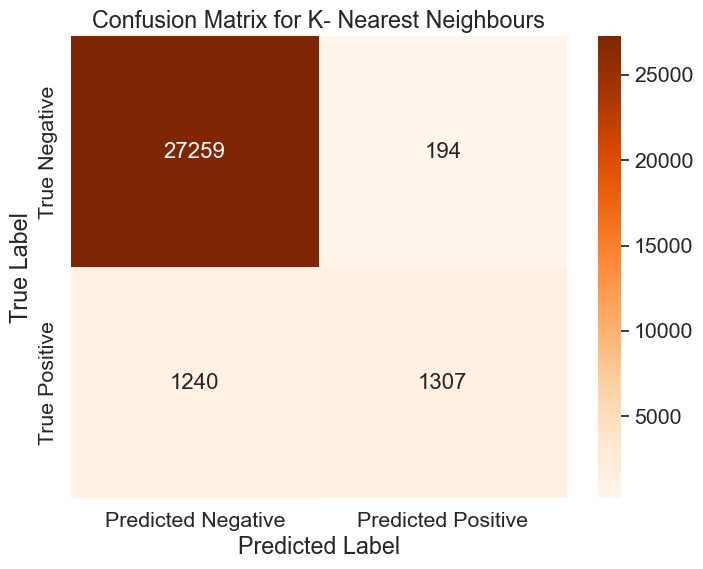

In [34]:
print("K- Nearest Neighbours:\n")
print("Acccuracy :", accuracy_3)
print("Precision :", precision_3)
print("Recall :", recall_3)
print("F1 score :", f1_score_3)
print("Confusion Matrix :\n", conf_matrix_3)
print("Classification Report :\n\n", report_3)
print("ROC AUC : \n", k_auc)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4) 
sns.heatmap(conf_matrix_3, annot=True, fmt='d', cmap='Oranges', annot_kws={'size': 16},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K- Nearest Neighbours')
plt.show()

In [35]:
# With 97% Accuracy and 97% Precison rate, Random Forest is the best algorithm for the current problem.

In [36]:
rf_auc = roc_auc_score(y_test, y_pred_1)
nb_auc = roc_auc_score(y_test, y_pred_2)
k_auc = roc_auc_score(y_test, y_pred_3)

In [37]:
print("KNNeighbors : AUROC = ",(k_auc))
print("Random Forest : AUROC = ",(rf_auc))
print("Gaussian : AUROC = ",(nb_auc))

KNNeighbors : AUROC =  0.7530430528724176
Random Forest : AUROC =  0.8439301357407201
Gaussian : AUROC =  0.787622100210502


In [38]:
k_fpr, k_tpr, _ = roc_curve(y_test, y_pred_2)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_1)
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_pred_3)

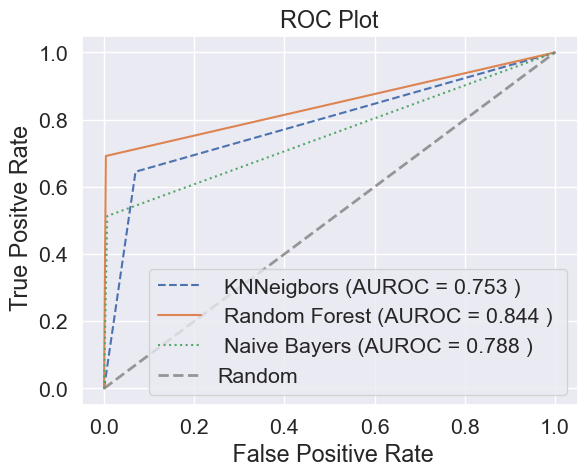

In [39]:
plt.plot(k_fpr, k_tpr, linestyle = '--', label = ' KNNeigbors (AUROC = %.3f ) ' % k_auc )
plt.plot(rf_fpr, rf_tpr, linestyle = 'solid', label = ' Random Forest (AUROC = %.3f ) ' % rf_auc )
plt.plot(nb_fpr, nb_tpr, linestyle = ':', label = ' Naive Bayers (AUROC = %.3f ) ' % nb_auc )
plt.plot([0,1], [0,1], linestyle = '--', lw = 2, color = 'gray', label = 'Random', alpha = .8)
plt.title('ROC Plot')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positve Rate')
plt.legend()
plt.show()